<a href="https://colab.research.google.com/github/marziyemahmoudifar/test2/blob/new1/apple_detection_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implementation of apple detection

In [1]:
%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


import library

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [4]:
!unzip gdrive/MyDrive/KFuji_RGB-DS_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: row data/BD11_inf_201710_138_pc.mat  
  inflating: row data/BD11_inf_201710_138_RGB.jpg  
  inflating: row data/BD11_sup_201710_004_pc.mat  
  inflating: row data/BD11_sup_201710_004_RGB.jpg  
  inflating: row data/BD11_sup_201710_007_pc.mat  
  inflating: row data/BD11_sup_201710_007_RGB.jpg  
  inflating: row data/BD11_sup_201710_010_pc.mat  
  inflating: row data/BD11_sup_201710_010_RGB.jpg  
  inflating: row data/BD11_sup_201710_013_pc.mat  
  inflating: row data/BD11_sup_201710_013_RGB.jpg  
  inflating: row data/BD11_sup_201710_037_pc.mat  
  inflating: row data/BD11_sup_201710_037_RGB.jpg  
  inflating: row data/BD11_sup_201710_043_pc.mat  
  inflating: row data/BD11_sup_201710_043_RGB.jpg  
  inflating: row data/BD11_sup_201710_046_pc.mat  
  inflating: row data/BD11_sup_201710_046_RGB.jpg  
  inflating: row data/BD11_sup_201710_049_pc.mat  
  inflating: row data/BD11_sup_201710_049_RGB.jpg  
  inflating: row data/

In [ ]:
DATADIR = "preprocessed data"
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['images', 'square_annotations1', 'sets', 'annotations']


In [ ]:
path = "/content/preprocessed data/annotations"
files = os.listdir(path)
print(files)

['BD12_sup_201711_027_09_RGB.csv', 'BD12_sup_201711_090_04_RGB.csv', 'BD12_sup_201711_093_09_RGB.csv', 'BD11_inf_201710_045_08_RGB.csv', 'BD12_inf_201711_020_06_RGB.csv', 'BD12_inf_201711_170_03_RGB.csv', 'BD12_inf_201711_047_03_RGB.csv', 'BD12_sup_201711_102_03_RGB.csv', 'BD11_inf_201710_054_08_RGB.csv', 'BD11_sup_201710_010_03_RGB.csv', 'BD12_sup_201711_096_01_RGB.csv', 'BD11_inf_201710_054_04_RGB.csv', 'BD12_sup_201711_054_08_RGB.csv', 'BD11_inf_201710_081_01_RGB.csv', 'BD11_sup_201710_166_04_RGB.csv', 'BD11_sup_201710_154_09_RGB.csv', 'BD11_inf_201710_003_01_RGB.csv', 'BD12_inf_201711_050_08_RGB.csv', 'BD12_sup_201711_015_01_RGB.csv', 'BD11_sup_201710_154_08_RGB.csv', 'BD12_inf_201711_116_04_RGB.csv', 'BD11_inf_201710_006_03_RGB.csv', 'BD12_inf_201711_095_03_RGB.csv', 'BD11_sup_201710_163_02_RGB.csv', 'BD11_sup_201710_154_04_RGB.csv', 'BD12_inf_201711_158_08_RGB.csv', 'BD11_sup_201710_037_05_RGB.csv', 'BD04_inf_201724_007_05_RGB.csv', 'BD11_inf_201710_078_05_RGB.csv', 'BD11_sup_201

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(548, 373)


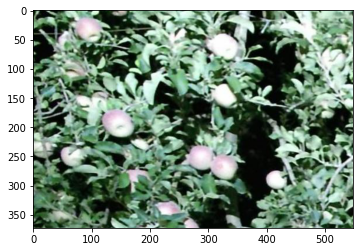

In [27]:
path = "/content/preprocessed data/images"
#files = os.listdir(path)
#print(files)
#image=(files[0])
# load the image
img = load_img("/content/preprocessed data/images/BD04_inf_201724_004_01_RGBhr.jpg")
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
from matplotlib.pyplot import imshow
plt.imshow(img)



In [34]:
path = "/content/preprocessed data/sets/train.txt"
with open(path) as f:
    contents = f.read()
    print(contents)
    list(contents)
    print(contents[0:26])
    mainname=contents[0:26]
    imhr=mainname +'hr'
    print(imhr)


BD12_inf_201711_086_02_RGB
BD11_sup_201710_157_05_RGB
BD11_inf_201710_030_01_RGB
BD11_sup_201710_157_01_RGB
BD12_sup_201711_063_04_RGB
BD12_inf_201711_179_03_RGB
BD11_inf_201710_003_04_RGB
BD12_inf_201711_164_04_RGB
BD11_inf_201710_045_08_RGB
BD11_sup_201710_037_02_RGB
BD12_inf_201711_098_01_RGB
BD12_inf_201711_041_03_RGB
BD11_sup_201710_073_02_RGB
BD12_sup_201711_102_01_RGB
BD12_inf_201711_131_02_RGB
BD11_inf_201710_138_04_RGB
BD11_inf_201710_084_08_RGB
BD11_inf_201710_132_09_RGB
BD12_inf_201711_116_04_RGB
BD04_inf_201724_040_05_RGB
BD12_inf_201711_098_09_RGB
BD11_sup_201710_049_03_RGB
BD11_sup_201710_076_05_RGB
BD04_inf_201724_052_04_RGB
BD04_inf_201724_028_04_RGB
BD11_sup_201710_163_05_RGB
BD12_sup_201711_171_02_RGB
BD12_sup_201711_060_01_RGB
BD11_inf_201710_096_07_RGB
BD11_sup_201710_004_05_RGB
BD12_inf_201711_104_01_RGB
BD11_inf_201710_051_01_RGB
BD12_inf_201711_038_01_RGB
BD04_inf_201724_040_07_RGB
BD12_inf_201711_167_07_RGB
BD12_inf_201711_179_04_RGB
BD12_inf_201711_101_03_RGB
B

AttributeError: ignored

In [ ]:
path = "/content/preprocessed data/sets/val.txt"
with open(path) as f:
    contents = f.read()
    print(contents)

BD11_sup_201710_013_08_RGB
BD12_inf_201711_098_08_RGB
BD12_inf_201711_170_01_RGB
BD12_sup_201711_069_01_RGB
BD04_inf_201724_004_05_RGB
BD12_inf_201711_104_02_RGB
BD12_inf_201711_014_02_RGB
BD11_sup_201710_118_04_RGB
BD11_sup_201710_076_04_RGB
BD12_inf_201711_023_02_RGB
BD12_inf_201711_107_07_RGB
BD12_sup_201711_015_01_RGB
BD12_sup_201711_027_07_RGB
BD11_inf_201710_072_01_RGB
BD12_inf_201711_008_08_RGB
BD11_sup_201710_055_04_RGB
BD12_inf_201711_020_09_RGB
BD04_inf_201724_055_04_RGB
BD12_inf_201711_023_04_RGB
BD12_inf_201711_008_09_RGB
BD11_inf_201710_051_05_RGB
BD12_inf_201711_131_01_RGB
BD11_sup_201710_007_08_RGB
BD11_inf_201710_051_03_RGB
BD12_sup_201711_102_04_RGB
BD11_inf_201710_129_09_RGB
BD12_sup_201711_015_03_RGB
BD11_inf_201710_006_04_RGB
BD11_sup_201710_076_09_RGB
BD04_inf_201725_015_01_RGB
BD04_inf_201724_040_02_RGB
BD12_sup_201711_054_09_RGB
BD12_sup_201711_063_06_RGB
BD04_inf_201724_028_03_RGB
BD11_sup_201710_013_07_RGB
BD11_sup_201710_007_05_RGB
BD12_inf_201711_095_02_RGB
B

In [ ]:
path = "/content/preprocessed data/sets/test.txt"
 pd.read_csv(path)

IndentationError: ignored